In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from pandas import *

In [62]:
df = read_csv('privacytest.csv', skiprows=1)

In [63]:
birthdate = df['Q75_1']
under13 = df['Q78_1']

#child = concat([birthdate, under13],axis=1)
df['child'] = (birthdate + under13) / 2
child= df['child'] 
#print(child)


In [64]:
outsidePurchase = df['Q80_1']
targetedAds = df['Q84_1']

#thirdparties = concat([outsidePurchase, targetedAds],axis=1)
df['thirdparties'] = (outsidePurchase + targetedAds) / 2
thirdparties= df['thirdparties']


In [65]:
gameRecs = df['Q87_1']
orderRecs = df['Q88_1']
friendRecs = df['Q89_1']

df['datatracking'] = (gameRecs + orderRecs+friendRecs) / 3
#datatracking = concat([gameRecs, orderRecs, friendRecs],axis=1)
datatracking=df['datatracking']

In [66]:
eyePhoto = df['Q133_1']
handPhoto = df['Q94_1']
facePhoto = df['Q132_1']

photos = (eyePhoto + handPhoto + facePhoto)/3


In [67]:
eyeData = df['Q94_1']
handData = df['Q131_1']
faceData = df['Q95_1']

#data = concat([eyeData, handData,faceData])
df['Average_data'] = (eyeData + handData+faceData) / 3
data=df['Average_data']

In [68]:

voice_moderation = df['Q69_1']
voice_buisness = df['Q71_1']

#voice = concat([voice_moderation, voice_buisness])
df['Average_voice'] = (voice_buisness + voice_moderation) / 2
voice = df['Average_voice']
df['biometric']= (voice + data) / 2
biometric = df['biometric']


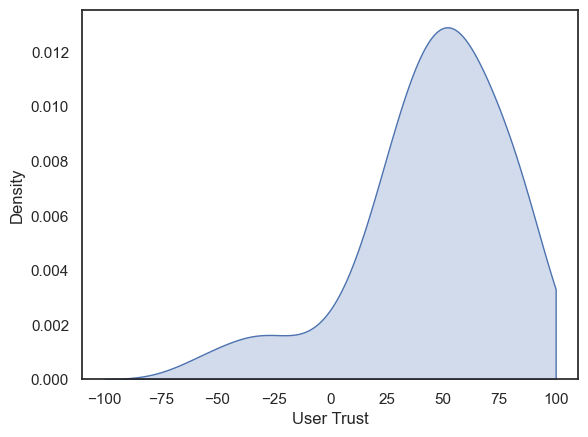

In [69]:
sns.kdeplot(data=child,fill=True,clip=(-100, 100))
plt.xlabel('User Trust')
sns.set(style="white")

Text(0.5, 0, 'User Trust')

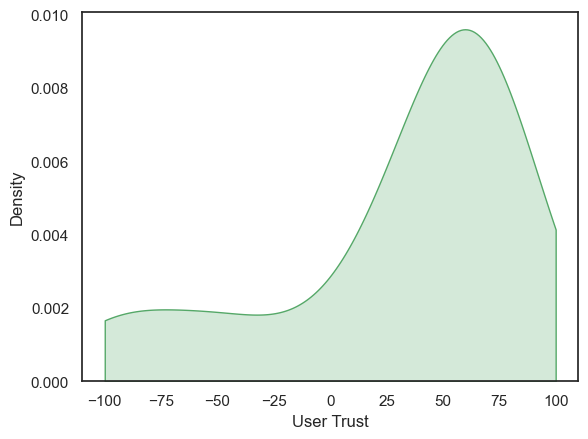

In [70]:
sns.kdeplot(thirdparties, color = "g",fill=True,clip=(-100, 100))
plt.xlabel('User Trust')


Text(0.5, 0, 'User Trust')

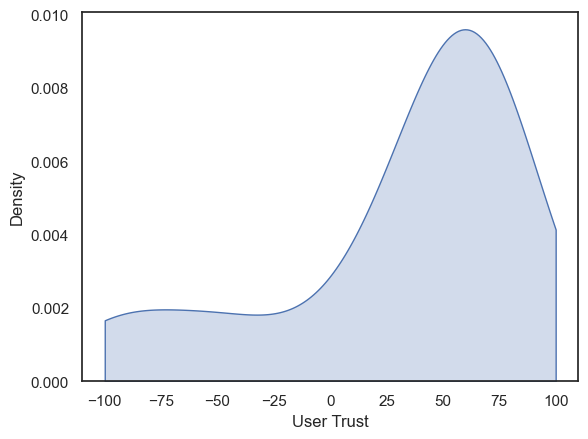

In [71]:
sns.kdeplot(data=thirdparties,color="b",fill=True,clip=(-100, 100))
plt.xlabel('User Trust')

Text(0.5, 0, 'User Trust')

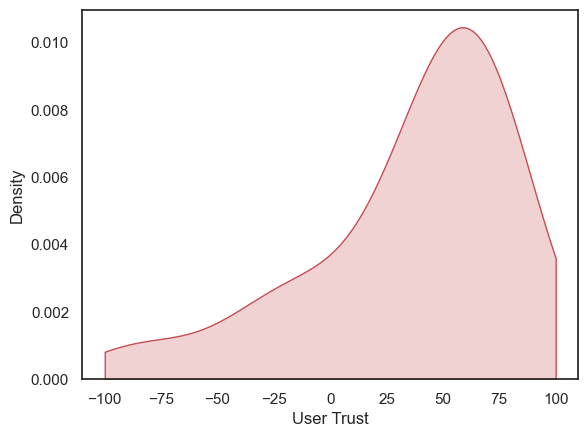

In [72]:
sns.kdeplot(data=biometric,color="r",fill=True,clip=(-100, 100))
plt.xlabel('User Trust')

Text(0.5, 0, 'User Trust')

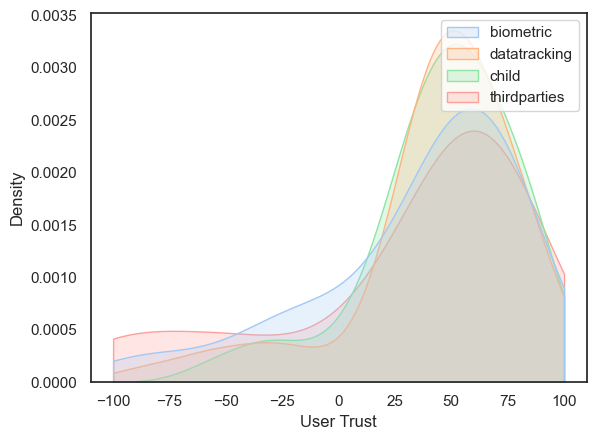

In [73]:
overall = concat([biometric, datatracking, child, thirdparties],axis=1)

sns.kdeplot(overall,fill=True, clip=(-100, 100),  palette="pastel")
plt.xlabel('User Trust')

# sns.kdeplot(thirdparties, color = "g", label = "Third Parties")
# sns.kdeplot(datatracking, color = "b", label = "Data Tracking")
#sns.kdeplot(child, color = "y", label = "Child Safety")
# sns.kdeplot(biometric, color = "r", label = "Biometric Data")
# plt.xlabel('User Trust')
# plt.show()

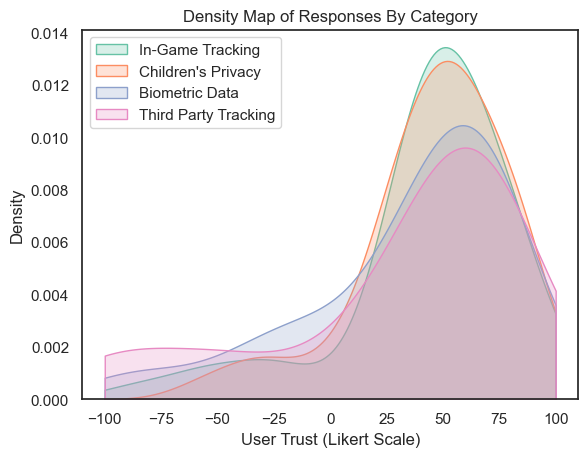

In [74]:
#overall = concat([thirdparties, biometric, child, datatracking],axis=1)

sns.set_palette("Set2")
sns.kdeplot(datatracking,fill=True, clip=(-100, 100))
sns.kdeplot(child,fill=True, clip=(-100, 100))
sns.kdeplot(biometric,fill=True, clip=(-100, 100))
sns.kdeplot(thirdparties,fill=True, clip=(-100, 100))

plt.xlabel('User Trust (Likert Scale)')
plt.title("Density Map of Responses By Category")
plt.legend(loc = "upper left", labels=["In-Game Tracking", "Children's Privacy", "Biometric Data", "Third Party Tracking"])
plt.savefig('plot.png', dpi=500, transparent=True)

# sns.kdeplot(thirdparties, color = "g", label = "Third Parties")
# sns.kdeplot(datatracking, color = "b", label = "Data Tracking")
#sns.kdeplot(child, color = "y", label = "Child Safety")
# sns.kdeplot(biometric, color = "r", label = "Biometric Data")
# plt.xlabel('User Trust')
# plt.show()

Text(0.5, 0, 'User Trust')

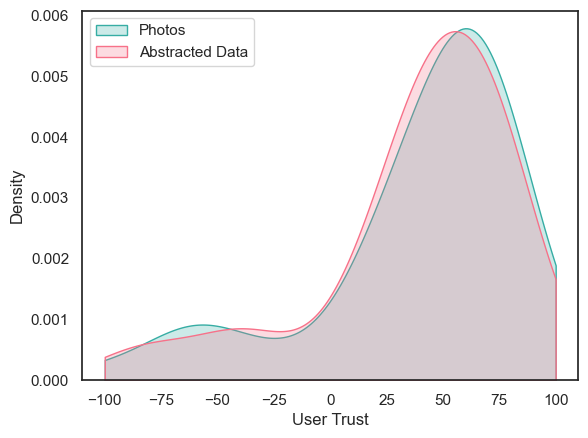

In [75]:
bio = concat([photos, data],axis=1)
sns.kdeplot(bio,fill=True, clip=(-100, 100), palette="husl")
plt.legend(loc = "upper left", labels=["Photos", "Abstracted Data"])
plt.xlabel('User Trust')